## Introduction to Data Science

### Introduction to Visualization Tools

In [1]:
import os
import sys
import pathlib

import pandas as pd
import numpy as np

## Data Visualization

[Source1](http://pbpython.com/visualization-tools-1.html)
[Source2](https://blog.modeanalytics.com/python-data-visualization-libraries/)
[Source3](https://www.dataquest.io/blog/python-data-visualization-libraries/)
[Source4](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)


[Examples of Stuning Data Visualizations](https://towardsdatascience.com/15-stunning-data-visualizations-and-what-you-can-learn-from-them-fc5b78f21fb8)

### [Matplotlib](http://matplotlib.org/users/pyplot_tutorial.html):  

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.  

In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that “axes” here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).  

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook

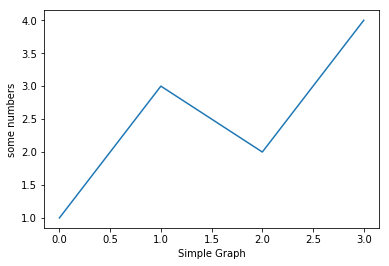

In [3]:
plt.plot([1,3,2,4])
plt.ylabel('some numbers')
plt.xlabel('Simple Graph')
#plt.axis([0,10,0,20])
plt.show()

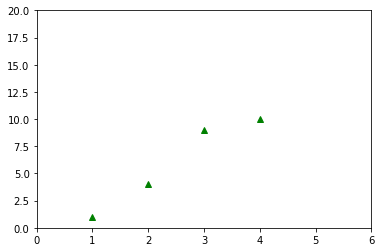

In [4]:
plt.plot([1,2,3,4], [1,4,9,10], 'g^')
plt.axis([0, 6, 0, 20])
plt.show()

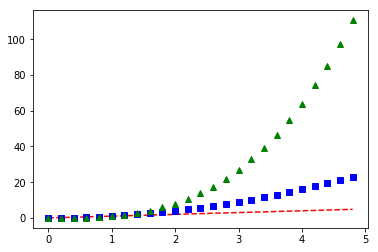

In [5]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') #all at the same time

plt.show()

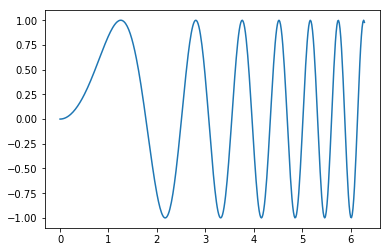

In [6]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
plt.plot(x,y)
plt.show()

Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. For very refined tuning of subplot creation, you can still use add_subplot() directly on a new figure.

Simple data to display in various forms


Just a figure and one subplot

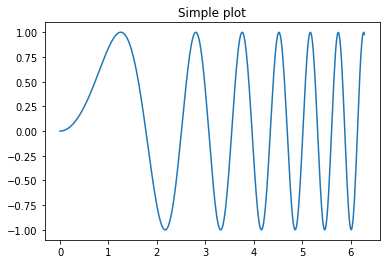

In [7]:
f, ax = plt.subplots()
ax.set_title('Simple plot')
ax.plot(x, y)
plt.show()

Two subplots, the axes array is 1-d

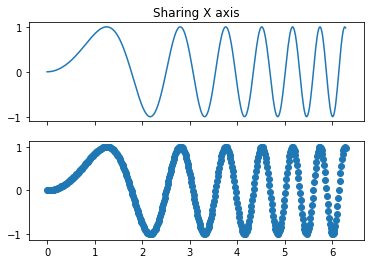

In [8]:
f, ax = plt.subplots(2, sharex=True)
ax[0].plot(x, y)
ax[0].set_title('Sharing X axis')
ax[1].scatter(x, y)
plt.show()

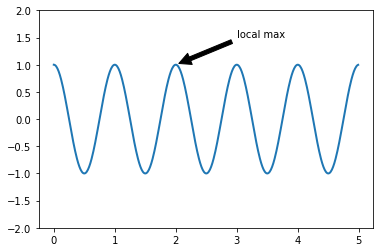

In [9]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

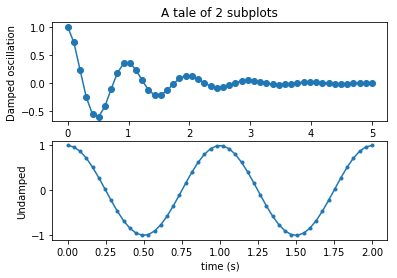

In [10]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

Two subplots, unpack the axes array immediately

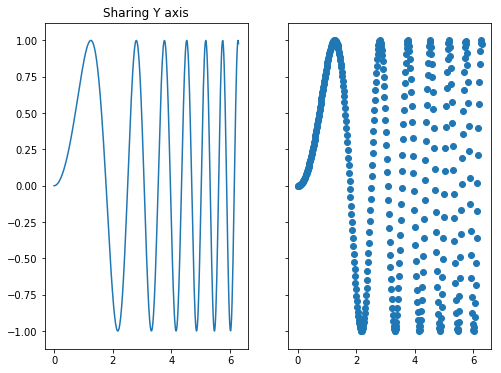

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

Three subplots sharing both x/y axes

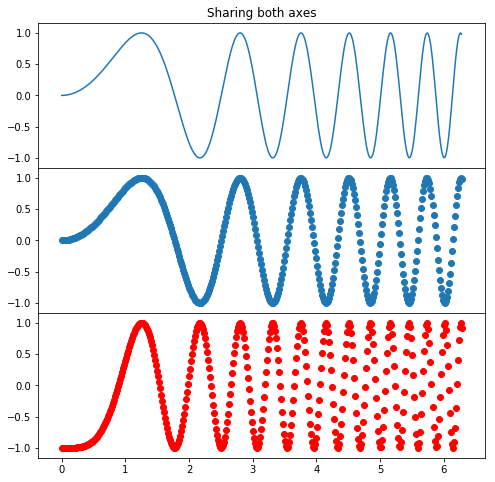

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(8,8))
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
#Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

row and column sharing

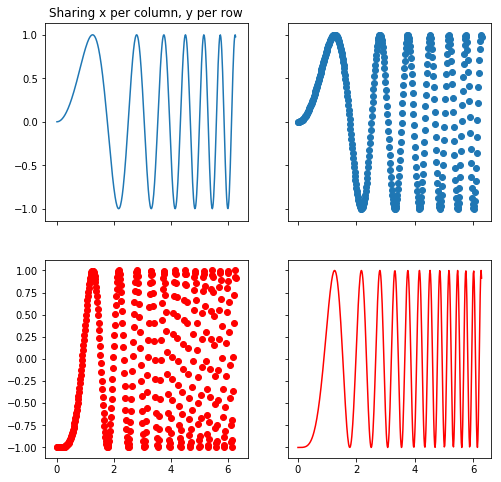

In [13]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,8))
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

Four axes, returned as a 2-d array

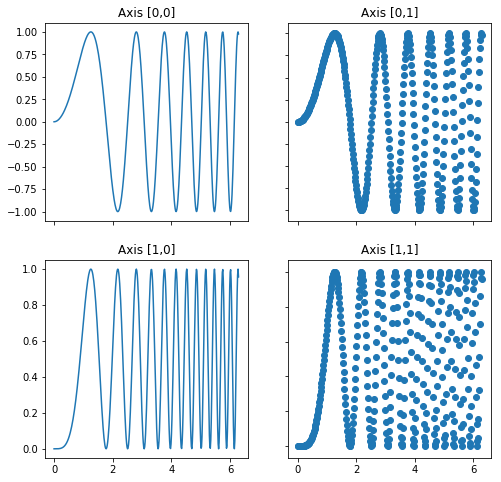

In [14]:
f, ax = plt.subplots(2, 2, figsize=(8,8))
ax[0, 0].plot(x, y)
ax[0, 0].set_title('Axis [0,0]')
ax[0, 1].scatter(x, y)
ax[0, 1].set_title('Axis [0,1]')
ax[1, 0].plot(x, y ** 2)
ax[1, 0].set_title('Axis [1,0]')
ax[1, 1].scatter(x, y ** 2)
ax[1, 1].set_title('Axis [1,1]')
#Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


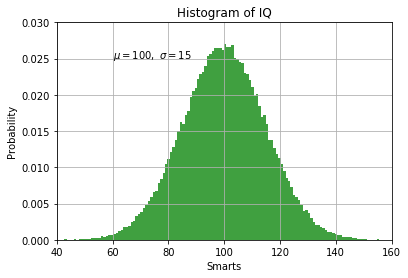

In [15]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(100000)

# the histogram of the data
n, bins, patches = plt.hist(x, 150, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, '$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

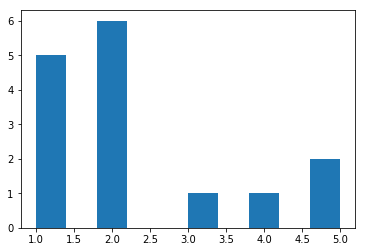

In [16]:
A = np.array([1,np.nan, 3,5,1,2,5,2,4,1,2,np.nan,2,1,np.nan,2,np.nan,1,2])
plt.figure()
plt.hist(A[~np.isnan(A)]) #,bins=5)
plt.show()

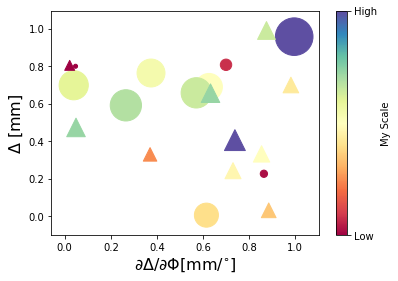

In [17]:
data = np.random.random((10, 4))
data2 = np.random.random((10, 4))

plt.subplots_adjust(bottom = 0.1)
plt.xlabel('$\partial \Delta/\partial\Phi[$mm$/^{\circ}]$', fontsize = 16)
plt.ylabel('$\Delta$ [mm]', fontsize = 16)

plt.scatter(data[:, 0], data[:, 1], marker = 'o', c = data[:, 3], s = data[:, 3]*1500,
            cmap = plt.cm.Spectral, vmin = min(data[:, 3]), vmax = max(data[:, 3]))
plt.scatter(data2[:, 0], data2[:, 1], marker = '^', c = data2[:, 2], s = data2[:, 2]*500,
            cmap = plt.cm.Spectral, vmin = min(data2[:, 2]), vmax = max(data2[:, 2]))

cbar = plt.colorbar(ticks = [min(data2[:, 2]), max(data2[:, 2])])
cbar.ax.set_yticklabels(['Low', 'High'])
cbar.set_label(r'My Scale')
plt.show()

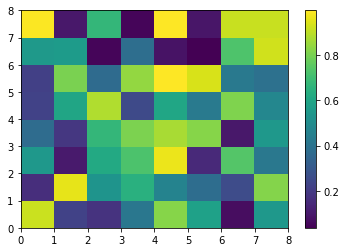

In [18]:
a = np.random.random((8,8))
#a = np.arange(64).reshape(8,8)
p = plt.pcolor(a)
plt.colorbar()
plt.show()

### [Bokeh](https://bokeh.pydata.org/en/latest/)

[1](https://towardsdatascience.com/data-visualization-with-bokeh-in-python-part-one-getting-started-a11655a467d4)
[2](https://github.com/WillKoehrsen/Bokeh-Python-Visualization/blob/master/intro/exploration/first_histogram.ipynb)

In [19]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook, curdoc
from bokeh.models import ColumnDataSource, HoverTool, Panel, Tabs, CheckboxGroup, CategoricalColorMapper
from bokeh.layouts import row, widgetbox
from bokeh.palettes import Category10_5, Category20_16

In [20]:
# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]
circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

GlyphRenderer(id='bdc2b631-8869-4c70-837c-bb84ffcc6ca9', ...)

In [21]:
# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)

Loading BokehJS ...

In [22]:
flights = pd.read_csv('../datasets/CSVs/flights.csv', index_col=0)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [23]:
sys.getsizeof(flights)

147428443

In [24]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 51.4+ MB


In [25]:
flights.dropna(inplace=True)

In [26]:
flights['arr_delay'].describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

In [27]:
"""Bins will be five minutes in width, so the number of bins 
is (length of interval / 5). Limit delays to [-60, +120] minutes using the range."""

arr_hist, edges = np.histogram(flights['arr_delay'], 
                               bins = int(180/5), 
                               range = [-60, 120])

# Put the information in a dataframe
delays = pd.DataFrame({'arr_delay': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [28]:
delays.head()

,arr_delay,left,right
0,276,-60.0,-55.0
1,636,-55.0,-50.0
2,1394,-50.0,-45.0
3,2820,-45.0,-40.0
4,5339,-40.0,-35.0


In [29]:
# Set up the figure
p = figure(plot_width = 500, plot_height = 500, title = 'Histogram of Arrival Delays',
          x_axis_label = 'Minutes', y_axis_label = 'Count')

# Add a quad glyph
p.quad(bottom=0, 
       top=arr_hist, 
       left=edges[:-1], 
       right=edges[1:], 
       fill_color='red', 
       line_color='black')

# To show in notebook
output_notebook()

# Show the plot
show(p)

Loading BokehJS ...

#### Adding Style

In [30]:
def style(p):
    p.title.align = 'center'
    p.title.text_font_size = '18pt'
    p.xaxis.axis_label_text_font_size = '12pt'
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.axis_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'
    
    return p

In [31]:
styled_p = style(p)

show(styled_p)

#### Adding Interactivity

In [32]:
arr_df = pd.DataFrame({'count': arr_hist, 'left': edges[:-1], 'right': edges[1:]})
arr_df['f_count'] = ['%d flights' % count for count in arr_df['count']]
arr_df['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]

arr_df.head()

,count,left,right,f_count,f_interval
0,276,-60.0,-55.0,276 flights,-60 to -55 minutes
1,636,-55.0,-50.0,636 flights,-55 to -50 minutes
2,1394,-50.0,-45.0,1394 flights,-50 to -45 minutes
3,2820,-45.0,-40.0,2820 flights,-45 to -40 minutes
4,5339,-40.0,-35.0,5339 flights,-40 to -35 minutes


In [33]:
arr_src = ColumnDataSource(arr_df)
arr_src.data.keys()

dict_keys(['count', 'left', 'right', 'f_count', 'f_interval', 'index'])

In [34]:
# Convert to column data source
src = ColumnDataSource(delays)
src.data.keys()

dict_keys(['arr_delay', 'left', 'right', 'index'])

#### Adding tooltips

In [35]:
# Set up the figure same as before
p = figure(plot_width = 500, plot_height = 500, title = 'Histogram of Arrival Delays',
          x_axis_label = 'Minutes', y_axis_label = 'Count')

# Add a quad glyph with source this time
p.quad(bottom=0, 
       top='count', 
       left='left', 
       right='right', 
       source=arr_src,
       fill_color='red', 
       line_color='black')

# Add style to the plot
styled_p = style(p)

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Delay', '@f_interval'),
                              ('Count', '@f_count')])

# Add the hover tool to the graph
styled_p.add_tools(hover)

# Show the plot
show(styled_p)

#### Adding hover tool

In [36]:
# Hover tool referring to our own data field using @ and
# a position on the graph using $
h = HoverTool(tooltips = [('Delay Interval Left ', '@left'),
                          ('(x,y)', '($x, $y)')])

In [37]:
# Add a column showing the extent of each interval
delays['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(delays['left'], delays['right'])]

In [38]:
# Create the blank plot
p = figure(plot_height = 600, 
           plot_width = 600,
           title = 'Histogram of Arrival Delays',
           x_axis_label = 'Delay (min)]',
           y_axis_label = 'Number of Flights')

# Add a quad glyph with source this time
p.quad(bottom=0, 
       top='arr_delay', 
       left='left', 
       right='right', 
       source=src,
       fill_color='red', 
       line_color='black', 
       fill_alpha = 0.75,
       hover_fill_alpha = 1.0, 
       hover_fill_color = 'navy')

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Delay', '@f_interval'),
                              ('Num of Flights', '@f_flights')])

# Style the plot
p = style(p)

# Add the hover tool to the graph
p.add_tools(hover)

# Show the plot
show(p)

### Pandas Plotting

In [39]:
iris = pd.read_csv("../datasets/CSVs/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

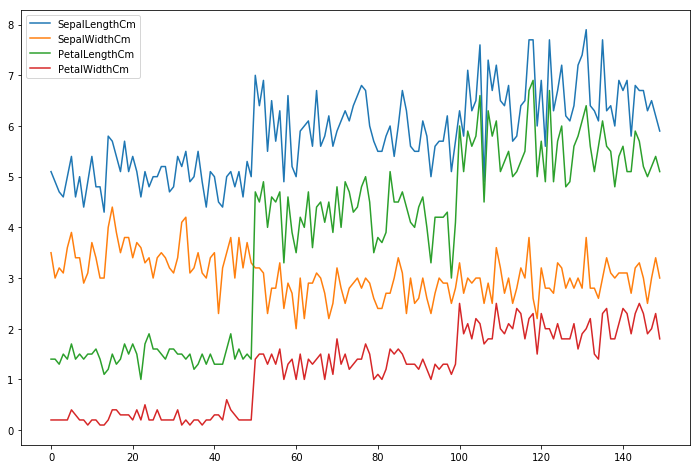

In [41]:
iris.drop("Id", axis=1).plot(figsize=(12,8))

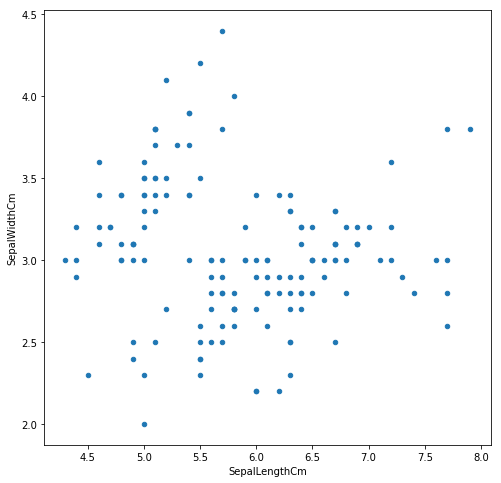

In [42]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f912c56c908>,
      dtype=object)

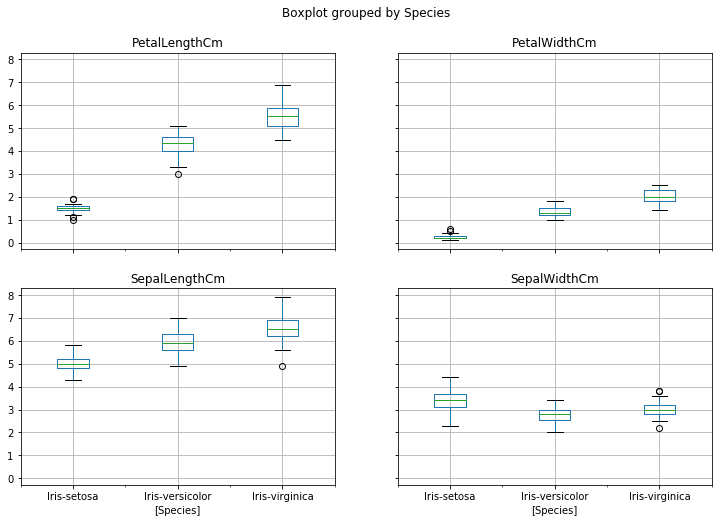

In [43]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 8))

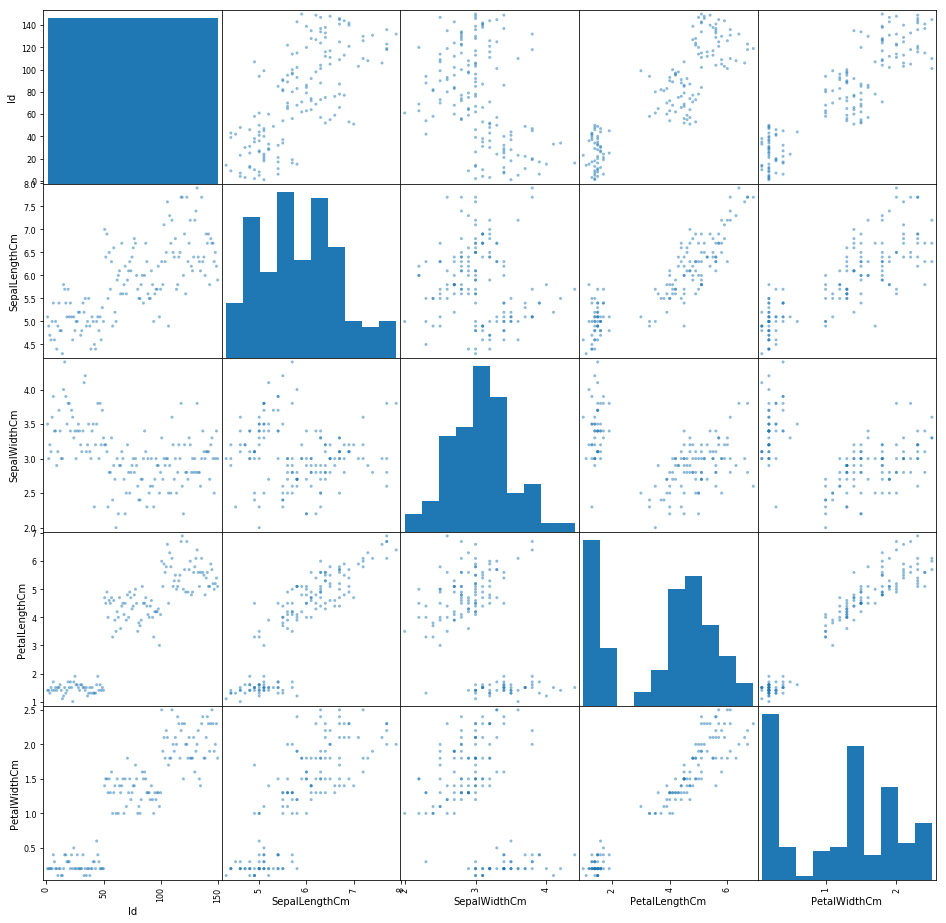

In [44]:
pd.plotting.scatter_matrix(iris, figsize=(16,16))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:6: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.


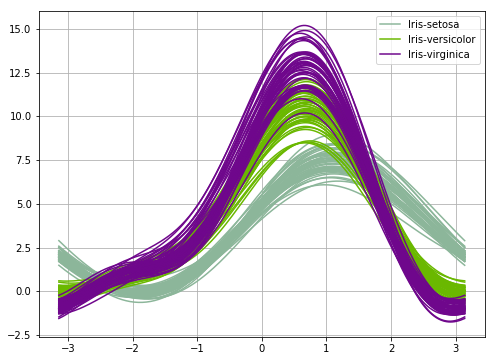

In [45]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
fig, ax = plt.subplots(figsize=(8,6))
andrews_curves(iris.drop("Id", axis=1), "Species",ax=ax)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


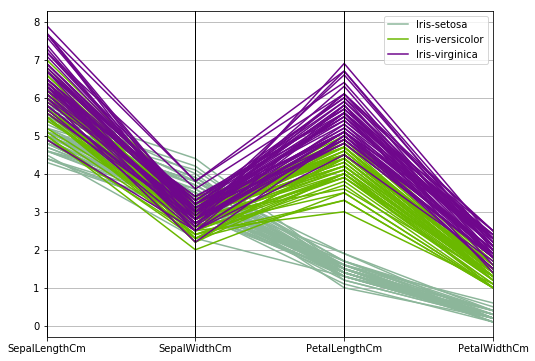

In [46]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
fig, ax = plt.subplots(figsize=(8,6))
parallel_coordinates(iris.drop("Id", axis=1), "Species", ax=ax)

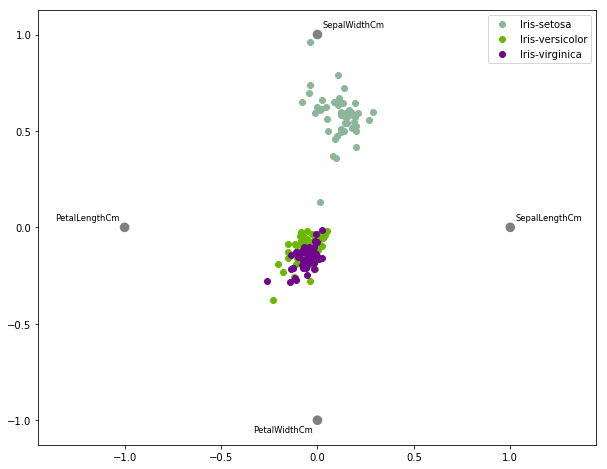

In [47]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(10,8))
radviz(iris.drop("Id", axis=1), "Species", ax=ax,)

### [Seaborn](https://seaborn.pydata.org/)

[1](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
[2](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

In [48]:
import seaborn as sns

#sns.set(style="white", color_codes=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


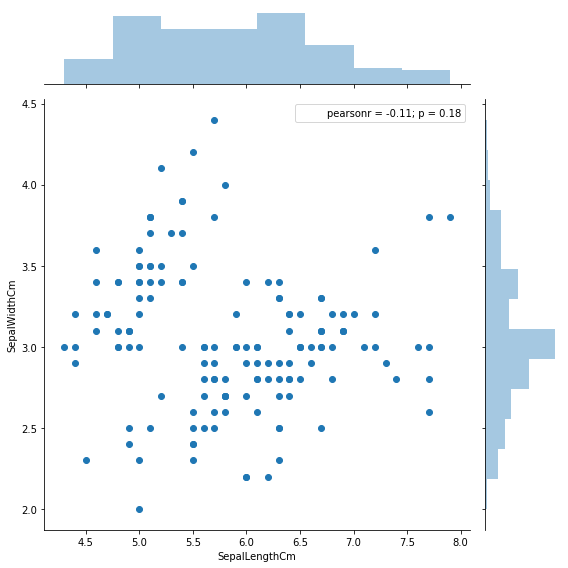

In [49]:
# We can also use the seaborn library to make a similar plot to Pandas
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=8)

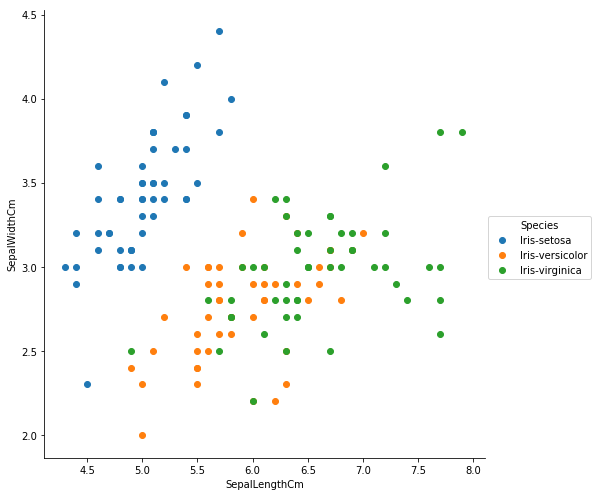

In [50]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=7).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

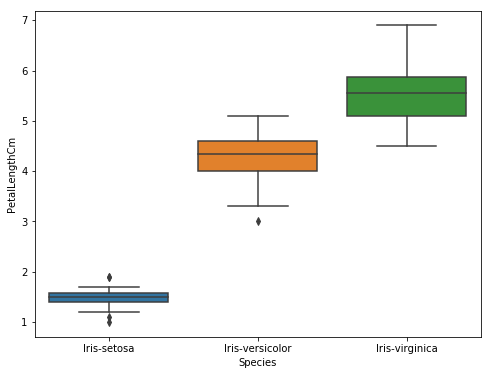

In [51]:
# We can look at an individual feature in Seaborn through a boxplot
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Species', y='PetalLengthCm', width=0.8, data=iris, ax=ax)

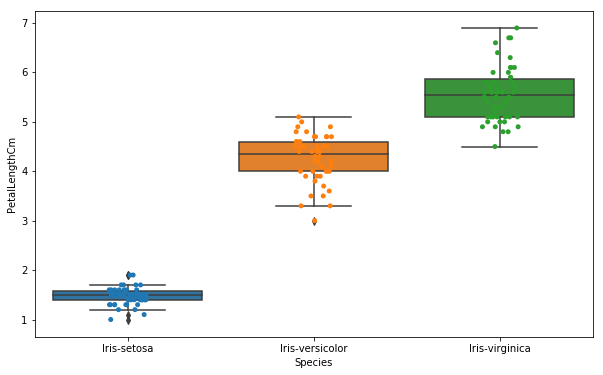

In [52]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, ax=ax)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, ax=ax, jitter=True, edgecolor="gray")

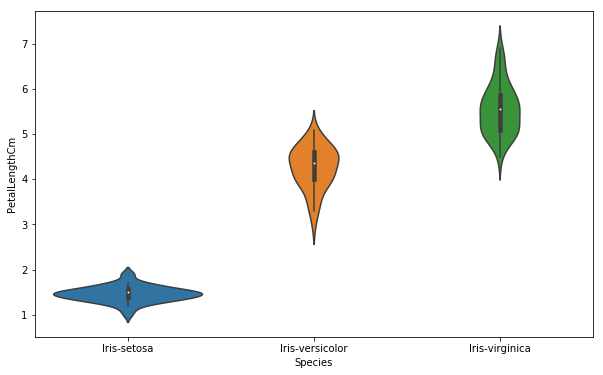

In [53]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6, ax=ax)

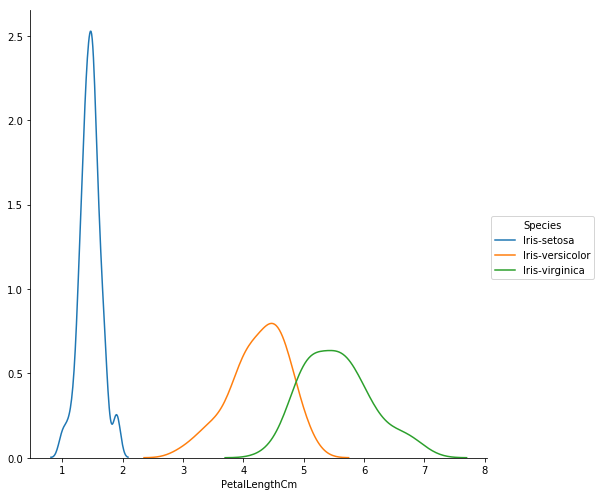

In [54]:
# A seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=7).map(sns.kdeplot, "PetalLengthCm").add_legend()

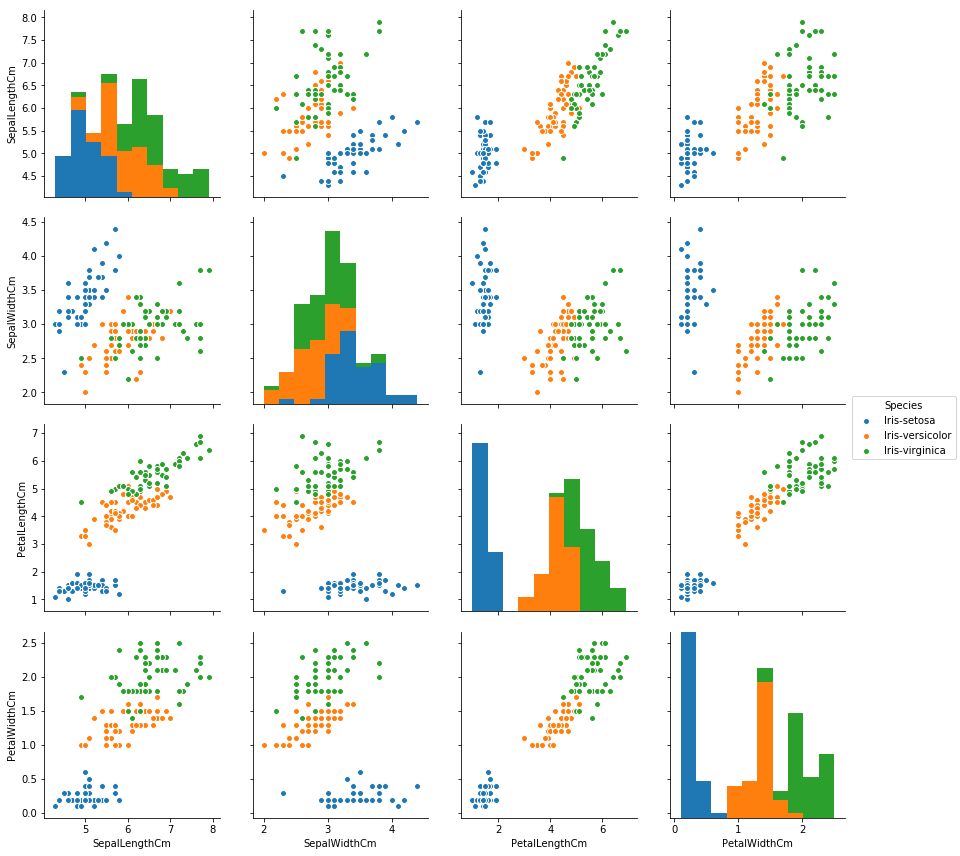

In [55]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

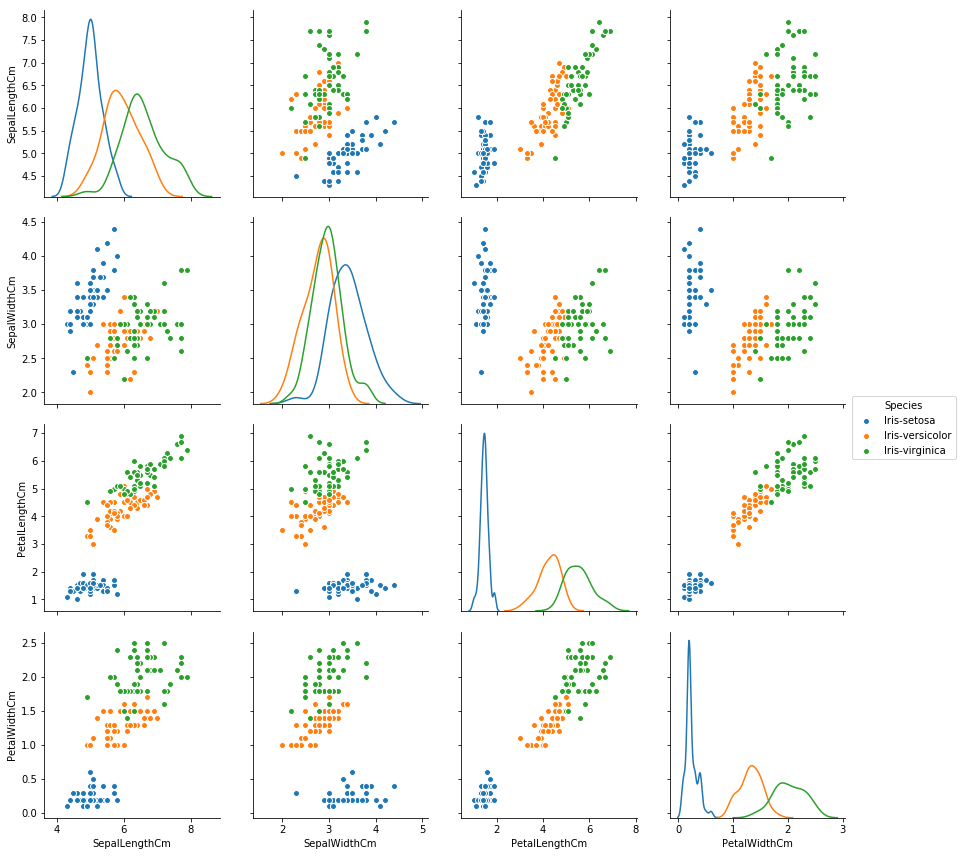

In [56]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

### [Plotly](https://plot.ly/python/)

In [57]:
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.tools as tls

## https://plot.ly/settings/api
py.sign_in('rsouza', open('../plotly_token.txt').read().strip())

##Even better, save your credentials permanently using the 'tools' module:
#tls.set_credentials_file(username='username', api_key='api-key')
#tls.set_credentials_file(username='rsouza', api_key=open('../plotly_token.txt').read().strip())

In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table, filename='table1')

In [59]:
schools = df.School
schools[0]

'MIT'

In [60]:
df.std()

Women    12.813683
Men      25.705289
Gap      14.137084
dtype: float64

In [61]:
data = [go.Bar(x=df.School,y=df.Gap)]

py.iplot(data, filename='basic_bar')

In [62]:
trace_women = go.Bar(x=df.School, y=df.Women, name='Women', marker=dict(color='#ffcdd2'))

trace_men = go.Bar(x=df.School, y=df.Men, name='Men', marker=dict(color='#A2D5F2'))

trace_gap = go.Bar(x=df.School, y=df.Gap, name='Gap', marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]

layout = go.Layout(title="Average Earnings for Graduates",
                   xaxis=dict(title='School'),
                   yaxis=dict(title='Salary (in thousands)'))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, sharing='public', filename='styled_bar')

In [63]:
from plotly.grid_objs import Grid, Column

import time

column_1 = Column([0.5], 'x')
column_2 = Column([0.5], 'y')
column_3 = Column([1.5], 'x2')
column_4 = Column([1.5], 'y2')

grid = Grid([column_1, column_2, column_3, column_4])
py.grid_ops.upload(grid, 'ping_pong_grid'+str(time.time()), auto_open=False)

'https://plot.ly/~rsouza/38/'

In [64]:
figure = {
    'data': [
        {
            'xsrc': grid.get_column_reference('x'),
            'ysrc': grid.get_column_reference('y'),
            'mode': 'markers',
        }
    ],
    'layout': {'title': 'Ping Pong Animation',
               'xaxis': {'range': [0, 2], 'autorange': False},
               'yaxis': {'range': [0, 2], 'autorange': False},
               'updatemenus': [{
                   'buttons': [
                       {'args': [None],
                        'label': 'Play',
                        'method': 'animate'}
               ],
               'pad': {'r': 10, 't': 87},
               'showactive': False,
               'type': 'buttons'
                }]},
    'frames': [
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference('x2'),
                    'ysrc': grid.get_column_reference('y2'),
                    'mode': 'markers',
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference('x'),
                    'ysrc': grid.get_column_reference('y'),
                    'mode': 'markers',
                }
            ]
        }
    ]
}

py.icreate_animations(figure, 'ping_pong'+str(time.time()))

### [Altair](https://altair-viz.github.io/)

https://altair-viz.github.io/user_guide/display.html#display-notebook

In [72]:
import altair as alt

In [73]:
from vega_datasets import data

df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [77]:
alt.Chart(df).mark_tick().encode(x='precipitation',)

In [78]:
alt.Chart(df).mark_bar().encode(alt.X('precipitation', bin=True),
                                alt.Y('count(*):Q'))

In [79]:
alt.Chart(df).mark_line().encode(
    alt.X('date:T', timeUnit='month'),
    alt.Y('average(precipitation)'))

### [MplD3](http://mpld3.github.io/)

In [80]:
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [20/Mar/2018 19:38:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2018 19:38:18] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2018 19:38:18] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2018 19:38:18] code 404, message Not Found
127.0.0.1 - - [20/Mar/2018 19:38:18] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/Mar/2018 19:38:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2018 19:38:46] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Mar/2018 19:38:46] "GET /mpld3.js HTTP/1.1" 200 -



stopping Server...


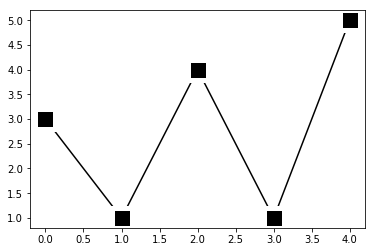

In [81]:
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
#mpld3.display()
mpld3.show()

### [Ggplot](http://ggplot.yhathq.com/)

### [Pygal](http://pygal.org/en/stable/)

### [Geoplotlib](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide)

### [Holoviews](http://holoviews.org/)

### [Folio (Leaflet)](http://python-visualization.github.io/folium/docs-v0.5.0/)